In [2]:
# !pip install pandas
# !pip install plotly
# !pip install cufflinks
#!pip install "ipywidgets>=7.6"  # Jupyter-lab

# PRACTICA 1

En esta practica se busca comparar los goles anotados por algunos equipos de futbol en Europa

Equipos: Bayern Munich, Borussia Dortmund, Real Madrid, Barcelona, Manchester City, Liverpool, Juventus y PSG

SIMBOLOGIA:

G: Partidos ganados, E: Partidos empatados, P: Partidos perdidos, PTS: Puntaje, GF: Goles a favor, GC: Goles en contra, year: Año


In [3]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML

cf.set_config_file(sharing='public',theme='pearl',offline=True) # write cf.getThemes() to find all themes available

In [4]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

# Los Datos

In [5]:
df_ligas = pd.read_csv('ligas.csv')
df_ligas.head()

,Club,G,E,P,PTS,GF,GC,year
0,Bayern Munich,27,3,4,84,92,28,2018
1,Bayern Munich,24,6,4,78,88,32,2019
2,Bayern Munich,26,4,4,82,100,32,2020
3,Bayern Munich,24,6,4,78,99,44,2021
4,Bayern Munich,16,1,3,49,65,19,2022


In [6]:
df_ligas = df_ligas.dropna()
# Redifinomos el dataframa
df_ligas = df_ligas.pivot(index='year', columns='Club',
                                    values='GF')
# Elegimos una muestra (es decir, solo las columnas que nos interesa)
df_ligas = df_ligas[['Bayern Munich', 'Real Madrid', 'Barcelona', 
                               'Juventus', 'Liverpool','PSG']]
df_ligas

Club,Bayern Munich,Real Madrid,Barcelona,Juventus,Liverpool,PSG
year,,,,,,
2018,92,94,99,86,84,108
2019,88,63,90,70,89,105
2020,100,70,86,76,85,75
2021,99,67,85,77,68,86
2022,65,47,32,34,58,46


# Lineplot
Para nuestra muestra de los equipos elegidos creamos un lineplot para cada uno.

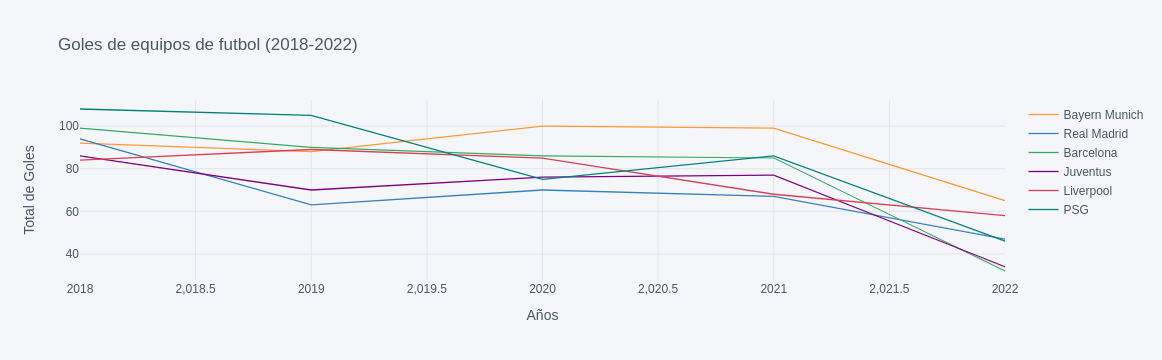

In [7]:
df_ligas.iplot(kind='line', xTitle='Años', yTitle='Total de Goles',
                    title='Goles de equipos de futbol (2018-2022)')

# Barplot

# Single Barplot

In [8]:
df_ligas

Club,Bayern Munich,Real Madrid,Barcelona,Juventus,Liverpool,PSG
year,,,,,,
2018,92,94,99,86,84,108
2019,88,63,90,70,89,105
2020,100,70,86,76,85,75
2021,99,67,85,77,68,86
2022,65,47,32,34,58,46


In [9]:
# Obtenemos un arreglo booleano que cumpla que el indice sea 2020
df_ligas.index.isin([2020])

array([False, False,  True, False, False])

In [10]:
# Obtenemos las observaciones
df_ligas[df_ligas.index.isin([2020])]

Club,Bayern Munich,Real Madrid,Barcelona,Juventus,Liverpool,PSG
year,,,,,,
2020,100,70,86,76,85,75


In [11]:
# Transpones nuestra matriz
df_ligas[df_ligas.index.isin([2020])].T

year,2020
Club,
Bayern Munich,100
Real Madrid,70
Barcelona,86
Juventus,76
Liverpool,85
PSG,75


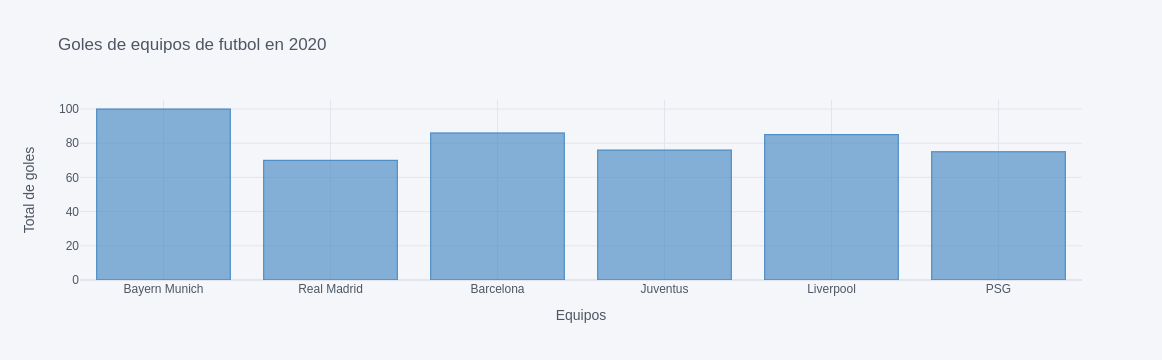

In [12]:
df_ligas_2020 = df_ligas[df_ligas.index.isin([2020])]
df_ligas_2020 = df_ligas_2020.T
df_ligas_2020.iplot(kind='bar', color='blue',
                           xTitle='Equipos', yTitle='Total de goles',
                           title='Goles de equipos de futbol en 2020')

# Barplot agrupado por n-variables

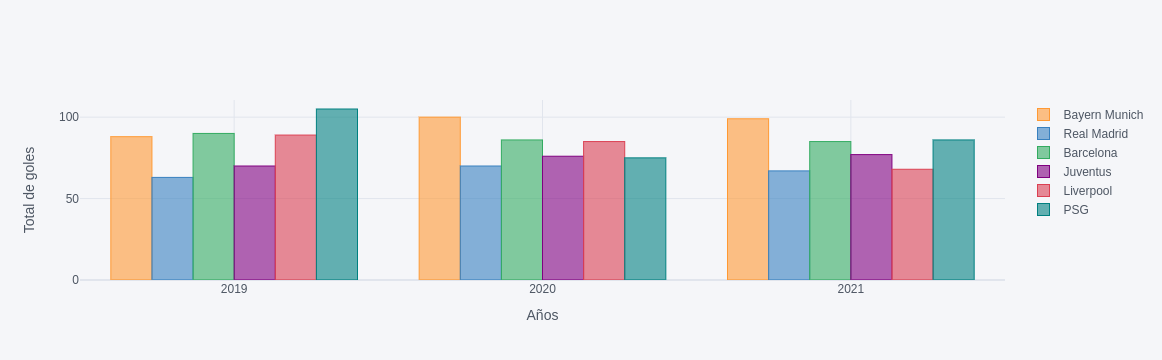

In [13]:
# filter years out
df_ligas_sample = df_ligas[df_ligas.index.isin([2019, 2020, 2021])]

# plotting
df_ligas_sample.iplot(kind='bar', xTitle='Años',
                           yTitle='Total de goles')

# Piechart

In [14]:
df_ligas_2020

year,2020
Club,
Bayern Munich,100
Real Madrid,70
Barcelona,86
Juventus,76
Liverpool,85
PSG,75


In [15]:
df_ligas_2020.reset_index()

year,Club,2020
0,Bayern Munich,100
1,Real Madrid,70
2,Barcelona,86
3,Juventus,76
4,Liverpool,85
5,PSG,75


In [18]:
df_ligas_2020.reset_index().rename(columns={2020:'2020'})

year,index,Club,2020
0,0,Bayern Munich,100
1,1,Real Madrid,70
2,2,Barcelona,86
3,3,Juventus,76
4,4,Liverpool,85
5,5,PSG,75


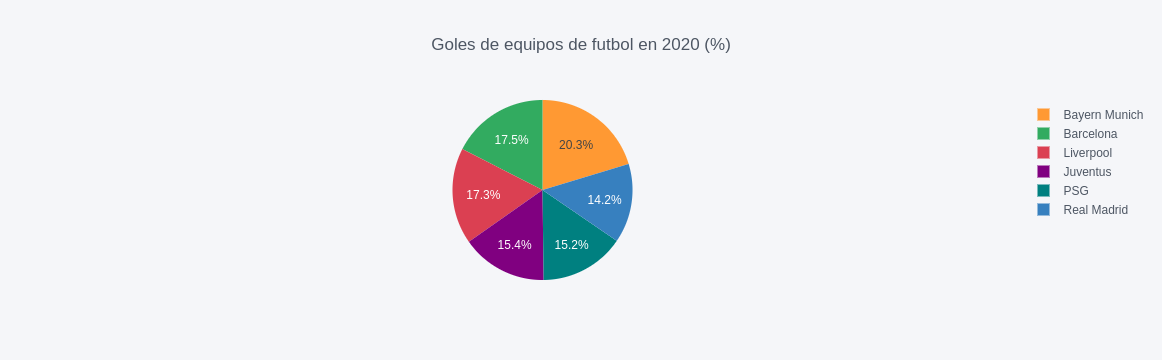

In [17]:
# transforming data
df_ligas_2020 = df_ligas_2020.reset_index()
df_ligas_2020 = df_ligas_2020.rename(columns={2020:'2020'})

# plotting
df_ligas_2020.iplot(kind='pie', labels='Club',
                         values='2020',
                         title='Goles de equipos de futbol en 2020 (%)')